In [6]:
data = []
for line in open("iris.data", "r"):
  try:
    items = line.strip().split(",")
    data.append(([float(i) for i in items[:4]], items[4]))
  except:
    pass

data

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


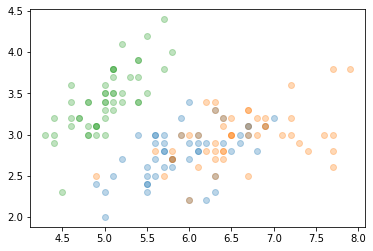

In [13]:
import matplotlib.pyplot as plt

classes = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']


for c in classes:
  X0 = []
  X1 = []
  for d in data:
    if d[1] == c:
      X0.append(d[0][0])
      X1.append(d[0][1])

  plt.scatter(X0, X1, alpha=0.3)

plt.show()

In [15]:
import random

random.shuffle(data)
train = data[:-30]
test = data[-30:]

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([5.1, 3.8, 1.9, 0.4], 'Iris-setosa'),
 ([5.0, 3.4, 1.6, 0.4], 'Iris-setosa'),
 ([5.6, 3.0, 4.1, 1.3], 'Iris-versicolor'),
 ([4.8, 3.1, 1.6, 0.2], 'Iris-setosa'),
 ([4.4, 3.0, 1.3, 0.2], 'Iris-setosa'),
 ([7.2, 3.2, 6.0, 1.8], 'Iris-virginica'),
 ([5.6, 2.8, 4.9, 2.0], 'Iris-virginica'),
 ([5.2, 2.7, 3.9, 1.4], 'Iris-versicolor'),
 ([7.9, 3.8, 6.4, 2.0], 'Iris-virginica'),
 ([4.6, 3.2, 1.4, 0.2], 'Iris-setosa'),
 ([4.5, 2.3, 1.3, 0.3], 'Iris-setosa'),
 ([5.8, 2.7, 5.1, 1.9], 'Iris-virginica'),
 ([6.9, 3.1, 5.1, 2.3], 'Iris-virginica'),
 ([6.7, 3.3, 5.7, 2.5], 'Iris-virginica'),
 ([6.3, 2.8, 5.1, 1.5], 'Iris-virginica'),
 ([5.4, 3.0, 4.5, 1.5], 'Iris-versicolor'),
 ([5.5, 2.4, 3.8, 1.1], 'Iris-versicolor'),
 ([7.7, 2.6, 6.9, 2.3], 'Iris-virginica'),
 ([5.1, 3.8, 1.6, 0.2], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.5, 4.2, 1.4, 0.2], 'Iris-setosa'),
 ([5.9, 3.2, 4.8, 1.8], 'Iris-versicolor

In [16]:
def distance(a, b):
  return sum((bi - ai) ** 2 for ai, bi in zip(a,b)) ** 0.5

In [25]:
from collections import Counter

def knn(query, k, train):

  # train 데이터 중에서 query랑 가장 가까운 k개 찾기
  dist_cls = []
  for v, c in train:
    d = distance(query, v)
    dist_cls.append( (d, c) )

  dist_cls.sort()
  dist_cls = dist_cls[:k]

  # 가중치를 준다면?!
  cls_cnt = {}
  for d, c in dist_cls:
    if c not in cls_cnt:
      cls_cnt[c] = 0
    cls_cnt[c] += 1

  # 찾은 것 중에서, 가장 많이 나온 class를 선택해서 return 하기
  cls_cnt = Counter([c for d, c in dist_cls])
  return cls_cnt.most_common(1)[0][0]



100%|██████████| 30/30 [00:24<00:00,  1.22it/s]


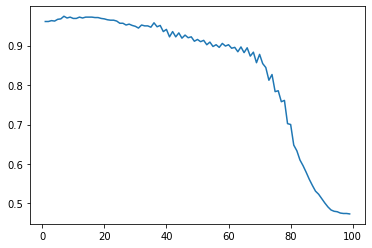

In [26]:
import matplotlib.pyplot as plt
from tqdm import tqdm

n_trials = 30
acc_avg = [0] * 100

for _ in tqdm(range(n_trials)):

  random.shuffle(data)
  train = data[:-30]
  test = data[-30:]

  for k in range(1,100):

    correct_cnt = 0
    for t_vec, t_cls in test:
      expected = knn(t_vec, k, train)
      if expected == t_cls:
        correct_cnt += 1

    accuracy = correct_cnt / len(test)
    acc_avg[k] += accuracy
  
acc_avg = [a / n_trials for a in acc_avg]
acc_avg = acc_avg[1:]
X = range(1,100)

plt.plot(X, acc_avg)
plt.show()